In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

# 1. Définition des fonctions
def f(x):
    """Fonction: x^3 + 4x - 2"""
    return x**3 + 4*x - 2

def df(x):
    """Dérivée de f: 3x^2 + 4"""
    return 3*x**2 + 4

# 2. Racine de haute précision (Approximation)
# Une approximation très précise est nécessaire pour calculer l'erreur absolue.
ROOT = 0.47345097484408105

# --- Méthode de Dichotomie (Linéaire, p=1) ---
def bisection_method(a, b, max_iter=8):
    errors = []

    # Vérification des signes pour garantir la convergence (TVI)
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) et f(b) doivent être de signes opposés.")

    for i in range(max_iter):
        mid = (a + b) / 2
        errors.append(abs(mid - ROOT))

        if f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid
    return errors

# --- Méthode de Newton-Raphson (Quadratique, p=2) ---
def newton_method(x0, max_iter=5):
    errors = []
    x = x0
    for i in range(max_iter):
        if df(x) == 0:
            break
        x_new = x - f(x) / df(x)
        errors.append(abs(x_new - ROOT))
        x = x_new
    return errors

Text(0.5, -4.2, 'Précision $10^{-4}$')

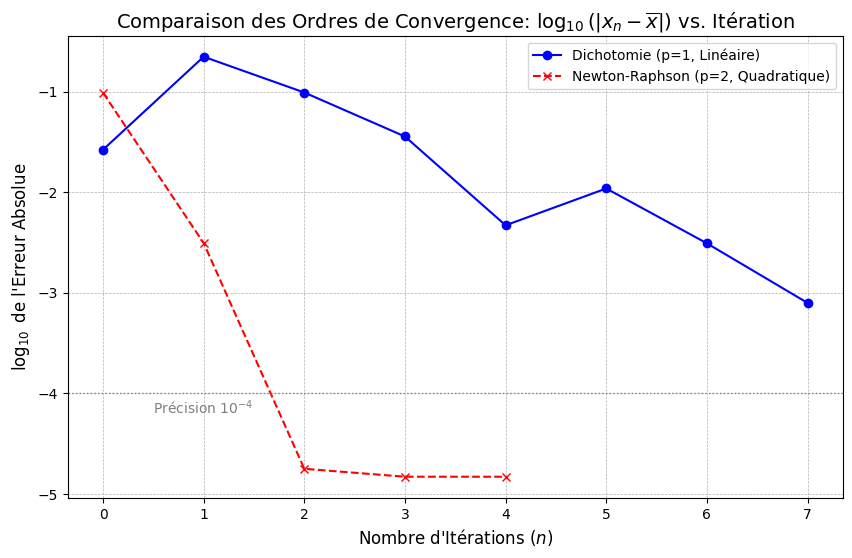

In [4]:
# 3. Exécution et calcul des erreurs
# Dichotomie sur [0, 1]
errors_bisection = bisection_method(0.0, 1.0, max_iter=8)
# Newton-Raphson à partir de x0=1.0
errors_newton = newton_method(1.0, max_iter=5)

# 4. Visualisation
plt.figure(figsize=(10, 6))

# Plot pour la Dichotomie
iterations_bisection = range(len(errors_bisection))
plt.plot(iterations_bisection, np.log10(errors_bisection),
         marker='o', linestyle='-', color='blue', label='Dichotomie (p=1, Linéaire)')

# Plot pour Newton-Raphson
iterations_newton = range(len(errors_newton))
plt.plot(iterations_newton, np.log10(errors_newton),
         marker='x', linestyle='--', color='red', label='Newton-Raphson (p=2, Quadratique)')

# Configuration du graphique
plt.title("Comparaison des Ordres de Convergence: $\\log_{10}(|x_n - \\overline{x}|)$ vs. Itération", fontsize=14)
plt.xlabel("Nombre d'Itérations ($n$)", fontsize=12)
plt.ylabel("$\\log_{10}$ de l'Erreur Absolue", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Explique l'axe y: -4 signifie une erreur de 10^-4
plt.axhline(y=np.log10(1e-4), color='gray', linestyle=':', linewidth=1)
plt.text(0.5, np.log10(1e-4) - 0.2, "Précision $10^{-4}$", color='gray')